In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from skimage.transform import resize
import matplotlib.pyplot as plt


In [2]:

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()


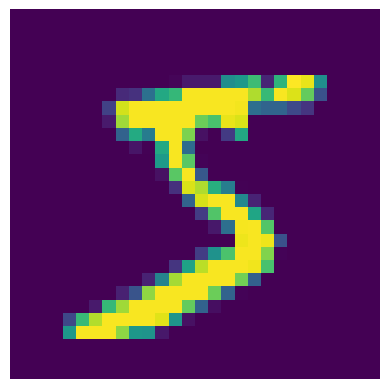

In [3]:
plt.imshow(x_train[0])
plt.axis('off')
plt.show()

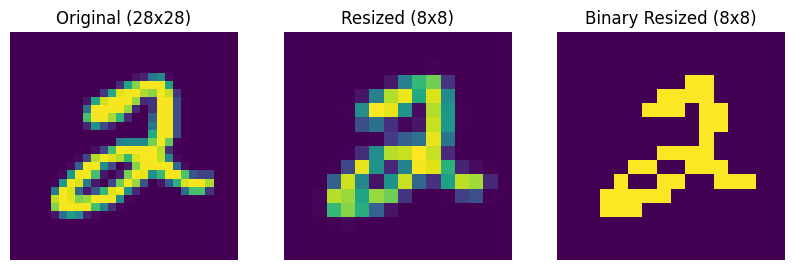

In [4]:


# Define the new dimensions
new_dim = (16, 16)

# Resize a single image example
example_image = x_train[5]
resized_image = resize(example_image, new_dim, anti_aliasing=True)

# Apply a binary threshold to the resized image
threshold = 0.5
resized_image_binary = (resized_image > threshold).astype('float32')

# Display the original, resized, and binary resized images for comparison
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].imshow(example_image)
axes[0].set_title('Original (28x28)')
axes[0].axis('off')

axes[1].imshow(resized_image)
axes[1].set_title('Resized (8x8)')
axes[1].axis('off')

axes[2].imshow(resized_image_binary)
axes[2].set_title('Binary Resized (8x8)')
axes[2].axis('off')

plt.show()


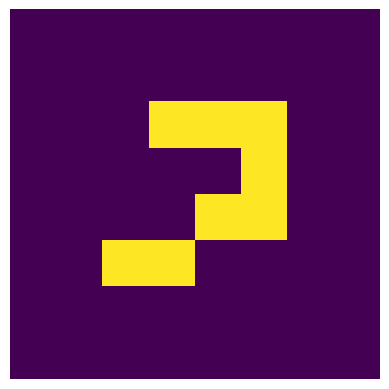

In [5]:
new_dim_1 = (8, 8)

# Resize a single image example
resized_image_1 = resize(resized_image_binary, new_dim_1, anti_aliasing=False)

# Apply a binary threshold to the resized image
threshold_1 = 0.5
resized_image_binary_1 = (resized_image_1 > threshold_1).astype('float32')

# Display the original, resized, and binary resized images for comparison
plt.imshow(resized_image_binary_1)
plt.axis('off')

plt.show()


Original training data shape: (60000, 28, 28)
Binarized and flattened training data shape: (60000, 784)


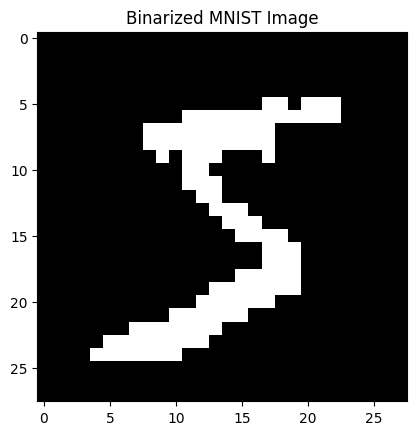

In [6]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 1. Normalize pixel values to the range [0, 1]
# This is a standard practice for neural networks
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 2. Binarize the images using a threshold
# This converts grayscale images to pure black (0) and white (1)
# Values above 0.5 become 1, and values at or below 0.5 become 0.
threshold = 0.5
x_train_binary = (x_train > threshold).astype('float32')
x_test_binary = (x_test > threshold).astype('float32')

# 3. Reshape the data for a fully connected neural network
# A 28x28 image needs to be flattened into a 784-element vector
x_train_flattened = x_train_binary.reshape(-1, 784)
x_test_flattened = x_test_binary.reshape(-1, 784)

# Print the shape of the processed data to confirm
print(f"Original training data shape: {x_train.shape}")
print(f"Binarized and flattened training data shape: {x_train_flattened.shape}")

# Example: Display a binarized image to show the result
plt.imshow(x_train_binary[0], cmap='gray')
plt.title("Binarized MNIST Image")
plt.show()

In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
from skimage.transform import resize

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize and resize the images
# A common practice is to normalize before resizing
x_train_resized = np.array([resize(img, (8, 8), anti_aliasing=True) for img in x_train])
x_test_resized = np.array([resize(img, (8, 8), anti_aliasing=True) for img in x_test])

# 3. Binarize the resized images
threshold = 0.5
x_train_binary = (x_train_resized > threshold).astype('float32')
x_test_binary = (x_test_resized > threshold).astype('float32')

# 4. Flatten the images to a 1D vector (8*8 = 64)
x_train_flattened = x_train_binary.reshape(-1, 64)
x_test_flattened = x_test_binary.reshape(-1, 64)

# Print the shapes to verify the final output
print(f"Original 28x28 training data shape: {x_train.shape}")
print(f"Final 8x8 flattened training data shape: {x_train_flattened.shape}")

# Example of how the data can be used as input to a simple neural network
# Define a simple model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels (e.g., 5 becomes [0, 0, 0, 0, 0, 1, 0, 0, 0, 0])
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

model = Sequential([
    # Input layer with 64 neurons (for the 8x8=64 flattened image)
    Dense(64, activation='relu', input_shape=(64,)), 
    Dense(32, activation='relu'),
    # Output layer with 10 neurons for the 10 classes (digits 0-9)
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with the prepared 8x8 flattened images
model.fit(x_train_flattened, y_train_one_hot, epochs=5, batch_size=32, validation_data=(x_test_flattened, y_test_one_hot))

Original 28x28 training data shape: (60000, 28, 28)
Final 8x8 flattened training data shape: (60000, 64)


Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 1.0386 - accuracy: 0.6536 - val_loss: 0.8471 - val_accuracy: 0.7196
Epoch 2/5
1875/1875 [==============================] - 2s 995us/step - loss: 0.8435 - accuracy: 0.7181 - val_loss: 0.7738 - val_accuracy: 0.7443
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7909 - accuracy: 0.7347 - val_loss: 0.7394 - val_accuracy: 0.7525
Epoch 4/5
1875/1875 [==============================] - 2s 983us/step - loss: 0.7634 - accuracy: 0.7434 - val_loss: 0.7244 - val_accuracy: 0.7580
Epoch 5/5
1875/1875 [==============================] - 2s 972us/step - loss: 0.7462 - accuracy: 0.7474 - val_loss: 0.7172 - val_accuracy: 0.7603


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from skimage.transform import resize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


(-0.5, 27.5, 27.5, -0.5)

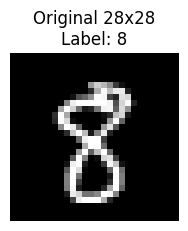

In [9]:

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Choose an image to visualize (e.g., the first one)
example_index = 46
original_image = x_train[example_index]
original_label = y_train[example_index]

# Display the original 28x28 image
plt.figure(figsize=(10, 3))
plt.subplot(1, 4, 1)
plt.imshow(original_image, cmap='gray')
plt.title(f'Original 28x28\nLabel: {original_label}')
plt.axis('off')


In [10]:

# Normalize and resize the images
x_train_resized = np.array([resize(img, (8, 8), anti_aliasing=True) for img in x_train])
x_test_resized = np.array([resize(img, (8, 8), anti_aliasing=True) for img in x_test])


(-0.5, 7.5, 7.5, -0.5)

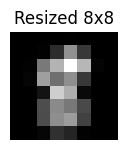

In [11]:
resized_image = x_train_resized[example_index]

# Display the resized 8x8 image
plt.subplot(1, 4, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Resized 8x8')
plt.axis('off')


(-0.5, 7.5, 7.5, -0.5)

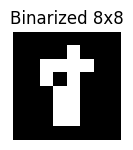

In [12]:

# Binarize the resized images
threshold = 0.3
x_train_binary = (x_train_resized > threshold).astype('float32')
x_test_binary = (x_test_resized > threshold).astype('float32')

binarized_image = x_train_binary[example_index]

# Display the binarized 8x8 image
plt.subplot(1, 4, 3)
plt.imshow(binarized_image, cmap='gray')
plt.title('Binarized 8x8')
plt.axis('off')



Flattened 64-element vector for image 46:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


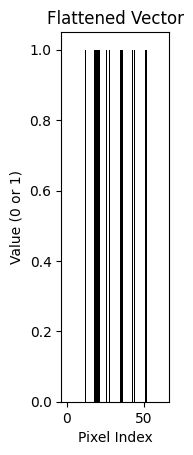

In [13]:

# Flatten the images to a 1D vector
x_train_flattened = x_train_binary.reshape(-1, 64)
x_test_flattened = x_test_binary.reshape(-1, 64)

# Print the flattened image vector
flattened_vector = x_train_flattened[example_index]
print(f"\nFlattened 64-element vector for image {example_index}:\n{flattened_vector}")

plt.subplot(1, 4, 4)
plt.bar(range(len(flattened_vector)), flattened_vector, color='black')
plt.title('Flattened Vector')
plt.xlabel('Pixel Index')
plt.ylabel('Value (0 or 1)')
plt.show()


In [14]:

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

# Build and compile the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(64,)),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("\nTraining the neural network...")
# Train the model with the prepared 8x8 flattened images
model.fit(x_train_flattened, y_train_one_hot, epochs=5, batch_size=32, verbose=1, validation_data=(x_test_flattened, y_test_one_hot))

print("\n--- Neural Network Output ---")
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test_flattened, y_test_one_hot, verbose=0)
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Make a prediction on a single test image
prediction = model.predict(x_test_flattened[example_index:example_index+1])
predicted_class = np.argmax(prediction)

print(f"\nActual Label for image {example_index}: {y_test[example_index]}")
print(f"Predicted Label for image {example_index}: {predicted_class}")
print(f"Prediction probabilities for each class (0-9):\n{prediction[0]}")


Training the neural network...
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6771 - accuracy: 0.7886 - val_loss: 0.4782 - val_accuracy: 0.8514
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4413 - accuracy: 0.8586 - val_loss: 0.4021 - val_accuracy: 0.8719
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3972 - accuracy: 0.8722 - val_loss: 0.3832 - val_accuracy: 0.8790
Epoch 4/5
1875/1875 [==============================] - 2s 974us/step - loss: 0.3752 - accuracy: 0.8794 - val_loss: 0.3658 - val_accuracy: 0.8818
Epoch 5/5
1875/1875 [==============================] - 2s 995us/step - loss: 0.3587 - accuracy: 0.8838 - val_loss: 0.3631 - val_accuracy: 0.8805

--- Neural Network Output ---
Test Accuracy: 88.05%
1/1 [==============================] - 0s 70ms/step

Actual Label for image 46: 1
Predicted Label for image 46: 1
Prediction probabilities for each class (0-9):
[3.13142823e-06 8.35314810e-01 2.56

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from skimage.transform import resize
from skimage.util import crop


In [16]:

# Load the MNIST dataset
(x_train, _), (_, _) = mnist.load_data()


(-0.5, 27.5, 27.5, -0.5)

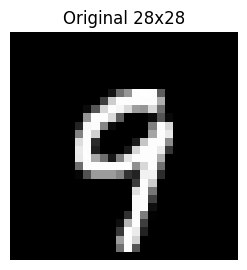

In [17]:

# Select an image to demonstrate the process
index = 1743
image_28x28 = x_train[index]

# Display the original image
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.imshow(image_28x28, cmap='gray')
plt.title('Original 28x28')
plt.axis('off')


(-0.5, 10.5, 18.5, -0.5)

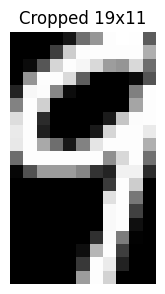

In [18]:

# 1. Find the bounding box of the non-zero pixels
rows = np.any(image_28x28, axis=1)
cols = np.any(image_28x28, axis=0)
ymin, ymax = np.where(rows)[0][[0, -1]]
xmin, xmax = np.where(cols)[0][[0, -1]]

# Add a small buffer to the crop to avoid losing edges
buffer = 0
ymin = max(0, ymin - buffer)
ymax = min(28, ymax + buffer)
xmin = max(0, xmin - buffer)
xmax = min(28, xmax + buffer)

# 2. Crop the image
cropped_image = image_28x28[ymin:ymax, xmin:xmax]

# Display the cropped image
plt.subplot(1, 3, 2)
plt.imshow(cropped_image, cmap='gray')
plt.title(f'Cropped {cropped_image.shape[0]}x{cropped_image.shape[1]}')
plt.axis('off')


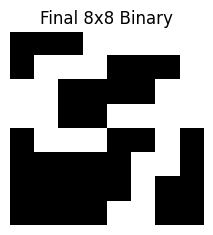

Final 8x8 flattened vector shape: (64,)


In [19]:

# 3. Resize the cropped image to 8x8
final_8x8 = resize(cropped_image, (8, 8), anti_aliasing=True)

# 4. Binarize and display the final 8x8 image
final_8x8_binary = (final_8x8 > 0.4).astype('float32')

plt.subplot(1, 3, 3)
plt.imshow(final_8x8_binary, cmap='gray')
plt.title('Final 8x8 Binary')
plt.axis('off')

plt.tight_layout()
plt.show()

# Print the final flattened vector
flattened_vector = final_8x8_binary.flatten()
print(f"Final 8x8 flattened vector shape: {flattened_vector.shape}")